<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/05-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

En esta notebook mostraremos el uso del clasificador **SVM** (Support Vector Machine). Realizaremos un ejemplo con datos artificiales, con fines didácticos.

Nos enfocaremos en los siguientes puntos:
*   Uso de kernels.
*   Efecto del parámetro $C$.
*   Busqueda de hiperparámetros.
*   Balanceo de clases.

Usaremos la implementación de sklearn, llamada [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Funciones que necesitamos para graficar las fronteras de decisión

def make_meshgrid(x, y, h=.02):
    '''
    función para hacer la malla de puntos para colorear las regiones de decisión,
    la malla de puntos abarca la región donde se encuentran los puntos (x,y)
    'h' es el tamaño de paso
    '''
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Ejemplo 1: Un caso linealmente separable

En este primer ejemplo mostramos el uso básico del SVM como clasificador en un ejemplo ilustrativo con datos linealmente separables.

### El conjunto de datos

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=2,
                  random_state=57)

print(X.shape, y.shape)

plt.figure()
plt.scatter(X[:,0], X[:,1],
            c=y # Observar que el color lo especificamos con el arreglo de etiquetas
            )
plt.show()

Veamos el balance entre etiquetas

In [ ]:
print(f"Instancias de la clase positiva: {y[y==1].shape[0]}. Porcentaje: {round(100*y[y==1].shape[0]/y.shape[0],2)}%")
print(f"Instancias de la clase negativa: {y[y==0].shape[0]}. Porcentaje: {round(100*y[y==0].shape[0]/y.shape[0],2)}%")

### La división *train/test*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

### Entrenamiento

Entrenemos y evaluemos el clasificador en el conjunto de entrenamiento

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear') # Sin hiperparametros se tiene C=1
clf.fit(X_train, y_train)
clf.score(X_train,y_train)  # Este score es el accuracy

### Evaluación

Evaluemos varias métricas en el conjunto de prueba

In [ ]:
clf.score(X_test,y_test)    # Este score es el accuracy

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"F1 Score: {f1_score(y_test,y_pred)}")

Obtuvimos métricas de rendimiento del 100%, **¿te parece sospechoso?**

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

Algunos hiperparámetros:

* `C`:  Este parámetro es fundamental para encontrar un equilibrio adecuado entre el ajuste del modelo a los datos de entrenamiento y la capacidad del modelo para generalizar a datos nuevos.
* `kernel`: Tipo de kernel usado.


Algunos métodos:

*   `score()`: Accuracy del clasificador en el conjunto especificado.
*   `predict()`: Predecir la clase del conjunto especificado usando el modelo ya entrenado.



En este ejemplo, ¿qué efecto tiene el parámetro $C$?

In [ ]:
from sklearn.svm import SVC

parametro_c = 100

clf_c = SVC(C=parametro_c,kernel='linear') # Sin hiperparametros se tiene C=1
clf_c.fit(X_train, y_train)
# clf_c.score(X_train,y_train)  # Este score es el accuracy

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones
fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")
plot_contours(ax1, clf_c, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')
plot_contours(ax2, clf_c, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

## Ejemplo 2: Un caso no linealmente separable

Ahora, analicemos otro ejemplo *toy* que no sea linealmente separable. Usaremos direntes kernels

### El conjunto de datos

Creamos un conjunto de datos con una condición XOR

In [ ]:
np.random.seed(17) # Fijamos un seed para la reproducibilidad de resultados

X = np.random.randn(1000, 2)
y = np.array([int(np.logical_xor(x[0] > 0, x[1] > 0)) for x in X])  # las etiquetas las asignamos en función de la comparación x0>0 XOR x1>0

plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Clase 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red',label='Clase 1')
plt.legend()
plt.show()

Veamos el balance entre etiquetas

In [ ]:
print(f"Instancias de la clase positiva: {y[y==1].shape[0]}. Porcentaje: {round(100*y[y==1].shape[0]/y.shape[0],2)}%")
print(f"Instancias de la clase negativa: {y[y==0].shape[0]}. Porcentaje: {round(100*y[y==0].shape[0]/y.shape[0],2)}%")

### Separación *train/test*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

### Clasificación

#### Kernel Lineal

Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Accuracy promedio de entrenamiento: {round(clf.score(X_train, y_train),3)}")
print(f"Accuracy promedio de prueba: {round(clf.score(X_test, y_test),3)}")

Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.

In [ ]:
#@title Graficar las fronteras de decisión

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=10)
clf.fit(X_train, y_train)

print(f"Accuracy promedio de entrenamiento: {round(clf.score(X_train, y_train),3)}")
print(f"Accuracy promedio de prueba: {round(clf.score(X_test, y_test),3)}")

In [ ]:
#@title Graficar las fronteras de decisión

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

#### Kernel Polinomial

Dado que los datos no son linealmente separables, usemos un kernel no lineal.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='poly',gamma=2)
clf.fit(X_train, y_train)

print(f"Accuracy promedio de entrenamiento: {round(clf.score(X_train, y_train),3)}")
print(f"Accuracy promedio de prueba: {round(clf.score(X_test, y_test),3)}")

In [ ]:
#@title Graficar las fronteras de decisión

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

### ⭕ Ejercicio

Probemos otros kernels. Tenemos disponibles varios kernels.

Con los mismos conjuntos de prueba y entrenamiento y con $C=1$:

1. Repetir el experimento de clasificación de arriba, usando otros kernels.
2. En cada caso que pruebes grafica los puntos (los de prueba) y la frontera de decisión.
3. En cada caso, reporta el valor de accuracy y F1 score, usando el conjunto de prueba solamente.

**¿Qué kernel parece dar mejores métricas de rendimiento?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

'''
------------------------
COMPLETA EL CÓDIGO:
* Usa un kernel que no sea lineal con C=1
* Obten el accuracy en el conjunto de entrenamiento
* Genera las predicciones sobre el conjunto de prueba
* Reporta las métricas Accuracy y F1-score en el conjunto de prueba
* Grafica las fronteras de decisión
------------------------
'''

clf =



In [ ]:
#@title Graficar las fronteras de decisión

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

* El kernel lineal es mejor para datos linealmente separables. Es una opción cuando el conjunto de datos es grande.
* El kernel Gaussiano (RBF) tiende a dar buenos resultados cuando no se tiene información adicional sobre los datos.
* Los kernels polinomiales tienden a dar buenos resultados cuando los datos de entrenamiento están normalizados.

[El truco del kernel](https://www.geogebra.org/m/xawkavxe)

⭕ Prueba también con otros valores de `C` y repite los pasos de arriba, ¿qué efecto tiene el modificar este valor en la clasificación y en la frontera de decisión?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

'''
------------------------
COMPLETA EL CÓDIGO:
* Usa un kernel Gaussiano con diferentes valores de C
* Obten el accuracy en el conjunto de entrenamiento
* Genera las predicciones sobre el conjunto de prueba
* Reporta las métricas Accuracy y F1-score en el conjunto de prueba
* Grafica las fronteras de decisión
------------------------
'''

clf =

In [ ]:
#@title Graficar las fronteras de decisión

xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

### Usando gridsearch para encontrar los mejores parámetros

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) toma un estimador (por ejemplo, SVM) y un conjunto de parámetros del estimador. Sobre estos parámetros hace una busqueda para encontrar la combinación de parámetros que da mejores resultados en el estimador.

GridSearchCV tiene métodos “fit” y “score” method, entre otros. Es decir, no es necesario tomar los parámetros e introducirlos en el estimador.

In [ ]:
from sklearn.model_selection import GridSearchCV

Encuentra los mejores parámetros para el clasificador SVM utilizando grid search. Guíate por el desempeño en el set de entrenamiento y validación.

Prueba los siguientes hyperparámetros.
* kernel = linear, polynomial, rbf
* C = 0.01, 0.1, 1.0, 10, 100
* grado del polinomio = 1, 2, 3, 4 (solo para el kernel polinomial)
* gamma = auto, scale:

Definimos los parámetros sobre los que se hará la busqueda

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

Realizamos una busqueda sobre estos parámetros

In [ ]:
clf = SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(x_train, y_train)

Veamos los mejores hiper-parámetros

In [ ]:
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Definamos un clasificador SVM con estos mejores hiperparámetros

In [ ]:
best_svm = SVC(C=100, kernel='poly', degree=2, gamma='auto')
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):6.4f}")

Graficamos la frontera de decisión

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, ax = plt.subplots(dpi=100)  # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen
plot_contours(ax, best_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Frontera de decisión del SVM')
plt.show()

## Ejemplo 3: MNIST

Ahora, trabajemos un ejemplo real, con dimensionalidad alta y no linealmente separable.

### El conjunto de datos

In [95]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


Veamos un para de instancias, con sus respectivas etiquetas

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.imshow(X[0].reshape(8,8),cmap='gray')
plt.title(y[0])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X[1].reshape(8,8),cmap='gray')
plt.title(y[1])
plt.axis('off')
plt.show()

Veamos el balanceo de las clases:

Usemos [numpy.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [105]:
u, c = np.unique(y, return_counts=True)

print(f"Etiquetas:\n{u}\n")
print(f"Conteos de ocurrencia de cada etiqueta:\n{c}\n")

Etiquetas:
[0 1 2 3 4 5 6 7 8 9]

Conteos de ocurrencia de cada etiqueta:
[178 182 177 183 181 182 181 179 174 180]



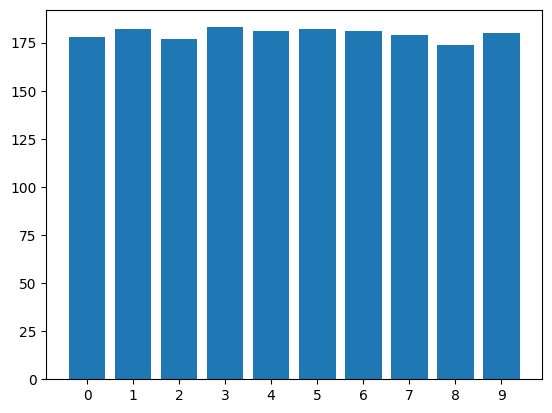

In [108]:
plt.figure()
plt.bar(u,c)
plt.xticks(u)
plt.show()

### Separación train/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,train_size=0.8)

print(X_train.shape)
print(X_test.shape)

### Clasificación y evaluación

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(f"Train Accuracy: {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)}")

### ⭕ Ejercicio

Hagamos una busqueda de hiperparámetros con GridSearchCV para mejorar el accuracy en el conjunto de prueba.

Prueba a variar, al menos, el parámetro $C$ y el kernel.